In [258]:
# this block initializes the structs for storing acitivities and patients

import os
from datetime import datetime
import pandas as pd
import time
from patient import Patient, Activity
import jsonpickle
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


In [259]:
src = './Data/HOA_Data'
# to-do

excel = './Data/HOA_Data/chi_unix.xlsx'
excel = pd.read_excel(excel)


activities = []
ids = []
patients = []

for i in range(len(excel)):
    row = excel.iloc[i]
    if row['Subject Index'] not in ids:
        ids.append(row['Subject Index'])

for id in ids: #flagging dupes for merging
    if len(id) >= 12:
        print(id)

temp_hold= []

for id in ids:
    # fetch all activities for each patients
    activities = []
    for i in range(len(excel)):
        act = excel.iloc[i]
        if act['Subject Index'] == id:            
            activities.append(Activity(
                act['Activity'], act['Length'], act['Record Time'], act['Subject Index']))
    patient = Patient(id, 0, activities, [None], 0, 0)
    
    if len(id) >=12:
        temp_hold.append(patient)
    else:
        patients.append(patient)



CHI2021 103b
CHI2021 105b
CHI2021 107b
CHI2021 104b


In [260]:

#merging temp hold with patients
for temp in temp_hold:
    found = 0
    for patient in patients:
        if patient.id in temp.id:
            patient.activities =  patient.activities + temp.activities #merge activities
            #update excel time
            patient.findMinTime()
            found =1
            break
    if (found ==0):
        temp.id = temp.id[:-1]
        print(temp.id)
        patients.append(temp)
    
            

CHI2021 103


In [261]:
#load in csvs
src = './Data/HOA_Data'
csv_file = []


for path, subdirs, files in os.walk(src):
    for name in files:  # for every file in this directory
        file = os.path.join(path, name)

        if 'ACC.csv' in file:  # if file name contains acc.csv, read data
            acc = pd.read_csv(file)
            csv_file.append(acc)  # append to a list

print(len(patients), len(csv_file))



53 39


In [262]:
matched_patients = list()
for patient in patients:
    #for every unique patient - cross reference csvs
    buffer = 3*60*60
    markers  = [0]*len(csv_file)
    for i,csv in enumerate(csv_file):
        if csv is None:
            continue
        time = float(csv.columns.values[0])
        
        if time >= (patient.excel_time - buffer) and time <= (patient.excel_time +buffer):  # within buffer
            patient.clean_acc(csv)
            markers[i]=1
            csv_file[i]=None
            i-=1
            matched_patients.append(patient)
            break
    print(sum(markers), patient.id)
# print(csv_file)

0 CHI2021 231
1 CHI2021 223
1 CHI2021 224
0 CHI2021 114
0 CHI2021 309
0 CHI2021 311
1 CHI2021 229
1 CHI2021 230
1 CHI2021 307
1 CHI2021 115
1 CHI2021 111
1 CHI2021 225
1 CHI2021 113
1 CHI2021 210
1 CHI2021 227
1 CHI2021 112
1 CHI2021 222
1 CHI2021 207
1 CHI2021 221
1 CHI2021 228
1 CHI2021 220
1 CHI2021 219
1 CHI2021 213
1 CHI2021 106
1 CHI2021 216
1 CHI2021 214
1 CHI2021 217
1 CHI2021 206
1 CHI2021 208
1 CHI2021 306
1 CHI2021 211
1 CHI2021 212
1 CHI2021 110
1 CHI2021 209
0 CHI2021 304
0 CHI2021 215
0 CHI2021 303
0 CHI2021 305
0 CHI2021 302
0 CHI2021 202
0 CHI2021 204
0 CHI2021 301
0 CHI2021 109
0 CHI2021 108
0 CHI2021 205
0 CHI2021 203
0 CHI2021 201
0 CHI2021 107
0 CHI2021 105
0 CHI2021 104
0 CHI2021 101
0 CHI2021 102
0 CHI2021 103


In [263]:
#print(jsonpickle.encode(patients[11], indent=4))
print('Patients without hits')

lost_patients = []
for patient in patients:
    if (patient.acc  is None):
        print(patient.id, patient.excel_time)
        lost_patients.append(patient)
print('Not found patients: ', len(lost_patients))

print('Csvs without hits')
lost_csvs = []
for csv in csv_file:
    if csv is not None:
        print(csv.head())
        lost_csvs.append(csv)
print('Not found CSVs:',  len(lost_csvs))


Patients without hits
CHI2021 231 1632940487
CHI2021 114 1628972286
CHI2021 309 1628606519
CHI2021 311 1628536683
CHI2021 304 1622902439
CHI2021 215 1622819510
CHI2021 303 1622557209
CHI2021 305 1622485854
CHI2021 302 1622218433
CHI2021 202 1622138631
CHI2021 204 1621513330
CHI2021 301 1622047028
CHI2021 109 1621957075
CHI2021 108 1621880215
CHI2021 205 1621621226
CHI2021 203 1621453259
CHI2021 201 1621017177
CHI2021 107 1620079227
CHI2021 105 1619803740
CHI2021 104 1619644918
CHI2021 101 1619469002
CHI2021 102 1619194627
CHI2021 103 1622064809
Not found patients:  23
Csvs without hits
   1623597626.000000   1623597626.000000   1623597626.000000.1
0               32.0                32.0                  32.0
1              -42.0               -48.0                   0.0
2              -41.0               -49.0                  -1.0
3              -42.0               -50.0                   0.0
4              -43.0               -50.0                  -1.0
   1623609318.000000   162360

In [264]:
#second pass to match up lost_csvs with lost_patients
buffer = 2000 *60 *60
for i, csv in enumerate(lost_csvs):
    if csv is None:
        continue
    time = float(csv.columns.values[0])
    for patient in lost_patients:
        if time >= (patient.excel_time - buffer) and time <= (patient.excel_time + buffer):  # within buffer
            print('match')
            break

match
match
match
match
match
match
match
match
match


In [265]:
def inOrder(patient):
    if not patient or not patient.activities:
        return True, patient.id

    prev_activity = -1
    for activity in reversed(patient.activities):
        if prev_activity == -1:
            prev_activity == activity
        elif(prev_activity.start >= activity.start):
            return False, patient.id, "Start"
        elif prev_activity.start + prev_activity.length >= activity.start + activity.length:
            return False, patient.id, "End"
        else:
            prev = activity

    return True, patient.id

In [266]:
def delDupes(patient):
    # print(f'length before deletion: {len(patient.activities)}')
    prev = -1
    for i, activity in enumerate(patient.activities):
        if prev == -1:
            prev = activity
        elif prev.start == activity.start:
            # print("start times are same")
            del patient.activities[i]
            i -= 1
        else:
            prev = activity
    # print(f'new length: {len(patient.activities)}')

In [267]:
not_in_order = list()
for patient in matched_patients:
    delDupes(patient)
    output = inOrder(patient)
    if (output[0] == False): 
        not_in_order.append([output[1], output[2]])
        print(inOrder(patient))
not_in_order

[]

In [268]:
def decreaseTime(activity, prev_activity):
    diff = activity.start - (prev_activity.start + prev_activity.length)
    num_to_sub = 0
    while diff - num_to_sub > 20:
        num_to_sub += 5
    return num_to_sub

In [269]:
for patient in patients:
    local_time = patient.csv_time
    if patient is None or patient.acc is None:
        continue
    
    print(patient.id, local_time, local_time + len(patient.acc))
    for activity in reversed(patient.activities):
        # Assuming activity.start is the global start time of the activity
        # Convert global start and end times of the activity to the patient.acc time scale
        activity_start_time_local = activity.start - patient.csv_time
        activity_end_time_local = activity.start + activity.length - patient.csv_time
        # print(activity_start_time_local, activity_end_time_local)
        # Check if the activity falls within the data collection period
        if (0 <= activity_start_time_local <= round(patient.acc['t'].iloc[-1])) and (0 <= activity_end_time_local <= round(patient.acc['t'].iloc[-1])):
            print("Local: ", activity_start_time_local, " ", activity_end_time_local, "Global: ", activity.start, " ", activity.start + activity.length)
            
            # Find the rows in patient.acc that correspond to the activity's time range
            activity_data = patient.acc[(patient.acc['t'] >= activity_start_time_local) & (patient.acc['t'] <= activity_end_time_local)]
            # print(activity_data)
            # Save the sliced data into activity.acc
            activity.acc = activity_data
            # print(activity.acc)
    print("")


CHI2021 223 1627656930.0 1628058671.0
Local:  329.0   995.0 Global:  1627657259   1627657925
Local:  1009.0   1169.0 Global:  1627657939   1627658099
Local:  1155.0   1408.0 Global:  1627658085   1627658338
Local:  1661.0   2540.0 Global:  1627658591   1627659470
Local:  3806.0   4352.0 Global:  1627660736   1627661282
Local:  5844.0   6683.0 Global:  1627662774   1627663613
Local:  6776.0   8268.0 Global:  1627663706   1627665198
Local:  8374.0   8680.0 Global:  1627665304   1627665610
Local:  8734.0   8974.0 Global:  1627665664   1627665904
Local:  8974.0   9054.0 Global:  1627665904   1627665984
Local:  9560.0   9747.0 Global:  1627666490   1627666677
Local:  9866.0   9999.0 Global:  1627666796   1627666929
Local:  10106.0   10319.0 Global:  1627667036   1627667249
Local:  10346.0   10599.0 Global:  1627667276   1627667529
Local:  11438.0   11611.0 Global:  1627668368   1627668541
Local:  11598.0   11838.0 Global:  1627668528   1627668768
Local:  11957.0   12157.0 Global:  162766888

In [270]:
matched_patients[0].acc

,x,y,z,t
2,3.218906,-2.605781,8.737031,0.00000
3,3.065625,-2.605781,8.583750,0.03125
4,3.065625,-2.605781,8.737031,0.06250
5,2.759063,-2.605781,8.583750,0.09375
6,2.605781,-2.605781,8.737031,0.12500
...,...,...,...,...
401738,3.832031,1.226250,8.430469,12554.25000
401739,3.832031,1.226250,8.583750,12554.28125
401740,3.985313,1.226250,8.583750,12554.31250
401741,3.832031,1.226250,8.583750,12554.34375


In [271]:
matched_patients[6].activities[0].acc

,x,y,z,t
311842,2.605781,9.350156,0.613125,9745.00000
311843,2.452500,9.350156,0.766406,9745.03125
311844,2.452500,9.350156,0.766406,9745.06250
311845,2.605781,9.350156,0.766406,9745.09375
311846,2.759063,9.350156,0.766406,9745.12500
...,...,...,...,...
315550,0.919687,9.810000,0.153281,9860.87500
315551,0.766406,9.350156,0.306563,9860.90625
315552,0.766406,8.583750,0.306563,9860.93750
315553,0.919687,8.737031,0.613125,9860.96875


In [ ]:
# for patient in patients[:
for i in range(2):
    patient = patients[i]
    local_time = patient.csv_time
    if patient is None or patient.acc is None:
        continue
    
    
    print(patient.id, local_time, local_time+ len(patient.acc))
    for activity in  reversed(patient.activities):
        if (activity.start+activity.length <= local_time+round(patient.acc['t'].iloc[-1])):
            delta = int(activity.start - local_time)*32 #something is wrong here possibly
            print(activity.length)
            newlength = delta + activity.length*32
            acc = patient.id + activity.name
            accplot = patient.id + activity.name
            acc = patient.acc.iloc[(delta):newlength] #splices ish without shift
            #print(patient.id + activity.name)
            #print(delta, activity.length*32)
        #plots acceleration
        time = patient.acc.iloc[:,3] #changed to time column
        voltx = patient.acc.iloc[:,0]
        volty = patient.acc.iloc[:,1]
        voltz = patient.acc.iloc[:,2]
            
        accplot = plt.plot(time,voltx, 'b', alpha = 0.5)
        accplot = plt.plot(time,volty, 'r', alpha = 0.5)
        accplot = plt.plot(time,voltz, 'g', alpha = 0.5) #trying to plot for comparison
            
        #plots derivative of acceleration    
        derivativex = []
        for i in range(3, len(voltx)):
            derivativex.append((voltx[i] - voltx[i-1])/0.03125)
        time2 = time.drop(index = [(time.size-1), (time.size-2)])
    
        derivativey = []
        for i in range(3, len(volty)):
            derivativey.append((volty[i] - volty[i-1])/0.03125)
        time2 = time.drop(index = [(time.size-1), (time.size-2)])

        derivativez = []
        for i in range(3, len(voltz)):
            derivativez.append((voltz[i] - voltz[i-1])/0.03125)
        time2 = time.drop(index = [(time.size-1), (time.size-2)])

        resultant = []
        time3 = time2.drop(index = [(time2.size-1), (time2.size-2), (time2.size-3), (time2.size-4)]) #???
        for i in range(3, len(derivativex)):
            resultant.append(np.sqrt(derivativex[i]**2 + derivativey[i]**2 + derivativez[i]**2))
        plt.plot(time3, resultant, 'b', alpha=1)
        plt.xlim(0, 250)
        plt.ylim(0,500)
        plt.show()
    

            #acc.to_csv(patient.id + activity.name + '.csv') will fill your computer with files
            
            
            #print("Local: ",activity.start - local_time, " ", activity.start  + activity.length - local_time, "Global: ", activity.start , " ", activity.start  + activity.length )
            
            #TODO
        
            # splice the patient.acc dataframe at the local time indices printed above, and save them into activity.acc
    print("")

In [249]:
def plot_sbs(person):
    plt.figure(figsize=(10, 6))
    adjustment = person.activities[1].start - person.csv_time
    print(f'Patient {person.id}s Adjustment: {adjustment} seconds')

    # Original times
    plt.plot(person.acc['t'], person.acc['x'], label='X-axis (Original)')
    # plt.plot(person_11['t'], person_11['y'], label='Y-axis (Original)')
    # plt.plot(person_11['t'], person_11['z'], label='Z-axis (Original)')

    # Local times adjusted
    # Adjusting local times for plotting purposes to visually compare on the same x-axis
    # Here, we plot local times but shift the labels to compare directly
    plt.plot(person.acc['t'] - adjustment, person.acc['x'], '--', label='X-axis (Local)', alpha=0.5)
    # plt.plot(person_11['t'] - local_time_adjustment, person_11['y'], '--', label='Y-axis (Local)', alpha=0.5)
    # plt.plot(person_11['t'] - local_time_adjustment, person_11['z'], '--', label='Z-axis (Local)', alpha=0.5)

    plt.title('ACC Data: Original vs. Local Times')
    plt.xlabel('Time (original scale)')
    plt.ylabel('ACC Values')
    plt.legend()
    plt.show()

Patient CHI2021 111s Adjustment: 9556.0 seconds


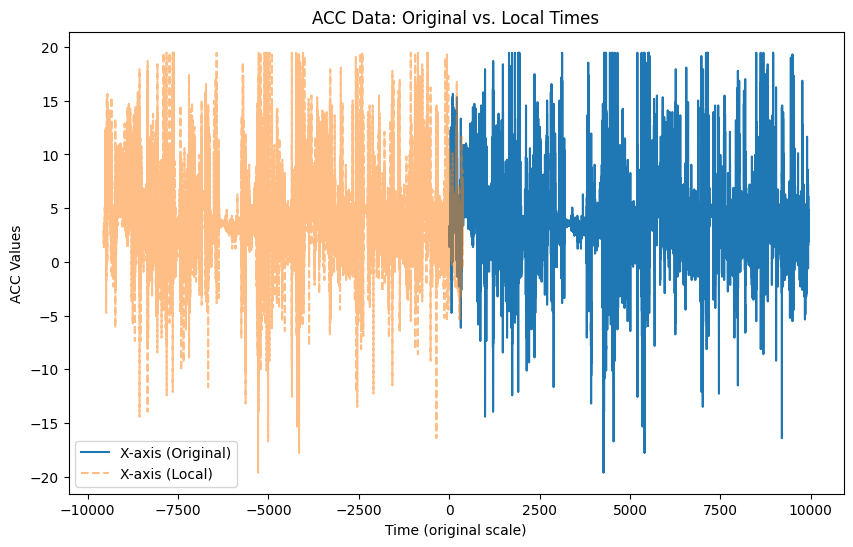

In [255]:
plot_sbs(matched_patients[6])